In [11]:
%cd /home/kenji/Projects/BasicProjects/KNN_CarClassifier

/home/kenji/Projects/BasicProjects/KNN_CarClassifier


In [108]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [109]:
#Import Data
data = pd.read_csv('car.data')
print(data.columns)

Index(['buying', 'maint', 'door', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


In [110]:
#Examine Data
print(data.head(10))

  buying  maint door persons lug_boot safety  class
0  vhigh  vhigh    2       2    small    low  unacc
1  vhigh  vhigh    2       2    small    med  unacc
2  vhigh  vhigh    2       2    small   high  unacc
3  vhigh  vhigh    2       2      med    low  unacc
4  vhigh  vhigh    2       2      med    med  unacc
5  vhigh  vhigh    2       2      med   high  unacc
6  vhigh  vhigh    2       2      big    low  unacc
7  vhigh  vhigh    2       2      big    med  unacc
8  vhigh  vhigh    2       2      big   high  unacc
9  vhigh  vhigh    2       4    small    low  unacc


In [111]:
#Missing Data?
def missing_data():
    for i in data.columns:
        if data[i].isnull().sum() > 0:
            print(i)
            print(data[i].isnull().sum())
        else:
            return 'Nothing Missing'
print(missing_data())

Nothing Missing


In [112]:
#Value Counts
for i in data.columns:
    print(i)
    print(data[i].value_counts(dropna=False))
## For now I think I'll just use label encoding to transform the data into numeric values.

buying
vhigh    432
med      432
high     432
low      432
Name: buying, dtype: int64
maint
vhigh    432
med      432
high     432
low      432
Name: maint, dtype: int64
door
4        432
2        432
3        432
5more    405
more      27
Name: door, dtype: int64
persons
4       576
2       576
more    576
Name: persons, dtype: int64
lug_boot
small    576
med      576
big      576
Name: lug_boot, dtype: int64
safety
med     576
high    576
low     576
Name: safety, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [113]:
for i in data.columns:
    print(i)
    print(data[i].unique())

buying
['vhigh' 'high' 'med' 'low']
maint
['vhigh' 'high' 'med' 'low']
door
['2' '3' '4' '5more' 'more']
persons
['2' '4' 'more']
lug_boot
['small' 'med' 'big']
safety
['low' 'med' 'high']
class
['unacc' 'acc' 'vgood' 'good']


In [114]:
#Initial Summary Statistics
print(data.info())
print(data.describe())
## As we can see, all

In [367]:
#Preprocess Data
encoder = LabelEncoder()
for i in data.columns:
    data[i] = encoder.fit_transform(data[i])
#data.reset_index(inplace=True)
    

In [368]:
print(data)

      buying  maint  door  persons  lug_boot  safety  class
0          3      3     0        0         2       1      2
1          3      3     0        0         2       2      2
2          3      3     0        0         2       0      2
3          3      3     0        0         1       1      2
4          3      3     0        0         1       2      2
...      ...    ...   ...      ...       ...     ...    ...
1723       1      1     3        2         1       2      1
1724       1      1     3        2         1       0      3
1725       1      1     3        2         0       1      2
1726       1      1     3        2         0       2      1
1727       1      1     3        2         0       0      3

[1728 rows x 7 columns]


In [369]:
#EDA: Feature Importance/Selection
# Convariance: Strength of Linear relationships

In [370]:
#Split Data
target = 'class'
y_data = data[target]
data[target] = y_data

print(y_data)
print(data)

x = np.array(data.drop([target],axis=1))
y = np.array(data[target])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

0       2
1       2
2       2
3       2
4       2
       ..
1723    1
1724    3
1725    2
1726    1
1727    3
Name: class, Length: 1728, dtype: int64
      buying  maint  door  persons  lug_boot  safety  class
0          3      3     0        0         2       1      2
1          3      3     0        0         2       2      2
2          3      3     0        0         2       0      2
3          3      3     0        0         1       1      2
4          3      3     0        0         1       2      2
...      ...    ...   ...      ...       ...     ...    ...
1723       1      1     3        2         1       2      1
1724       1      1     3        2         1       0      3
1725       1      1     3        2         0       1      2
1726       1      1     3        2         0       2      1
1727       1      1     3        2         0       0      3

[1728 rows x 7 columns]


In [371]:
#Fit/Train Model
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [372]:
#Evaluate Model
y_pred = KNN.predict(x_test)
probabilities = KNN.predict_proba(x_test)

def evaluate(model,y_pred,y_test):
    if model == 'linreg':
        print(linreg.score(x_test,y_test))
        print(linreg.coef_)
        y_pred = linreg.predict(x_test)
        #print(f'The Intercept (grade) is {linreg.intercept_}')
        for i in range(len(y_pred)):
            print(f'Predicted: {round(y_pred[i])}\t Actual: {y_test[i]} \t Data {x_test[i]}')
    if model == 'KNN':
        print(KNN.score(x_test,y_test))
        y_pred = y_pred.tolist()
        y_test = y_test.tolist()
        classes = ['unacc','acc','good','vgood']
        for i in range(len(y_pred)):
            print(f'Pred: {classes[y_pred[i]]}\t Actual: {classes[y_test[i]]} \t Probability: {probabilities[i]}')
    return

In [373]:
print(evaluate('KNN',y_pred,y_test))

0.8179190751445087
Pred: unacc	 Actual: unacc 	 Probability: [0.33333333 0.33333333 0.33333333 0.        ]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: good	 Actual: unacc 	 Probability: [0. 0. 1. 0.]
Pred: unacc	 Actual: good 	 Probability: [0.66666667 0.         0.33333333 0.        ]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: unacc	 Actual: unacc 	 Probability: [0.66666667 0.         0.33333333 0.        ]
Pred: unacc	 Actual: unacc 	 Probability: [0.33333333 0.         0.33333333 0.33333333]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: unacc	 Actual: acc 	 Probability: [0.33333333 0.33333333 0.33333333 0.        ]
Pred: vgood	 Actual: vgood 	 Probability: [0.33333333 0.         0.         0.66666667]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: good	 Actual: good 	 Probability: [0. 0. 1. 0.]
Pred: good	 Actual: vgood 	 Probability: [0.         0.         0.66666667 0.

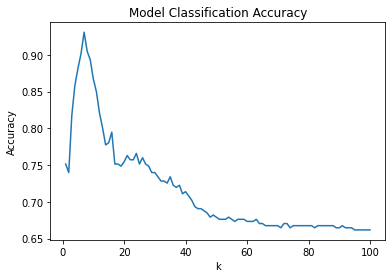

In [375]:
accuracies = []
for k in range(1,101):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train,y_train)
    accuracies.append(KNN.score(x_test,y_test))
    highest = max(accuracies)


k_list = range(1,101)
plt.plot(k_list,accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model Classification Accuracy')
plt.show()

In [ ]:
#TODO get and possibly plot distances
#TODO apply gridsearch?
#TODO make probabilities more interpretable
#TODO make eval function.. better
#TODO add more EDA graphs for groupings and variable comparisons (stats)

In [364]:

#accuracy = KNN.score(x_test,y_test)
#print(accuracy)
#Tune Model